<a href="https://www.quantrocket.com"><img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png"></a>

# Welcome to QuantRocket! 

### Start with this 5-minute interactive tour for new users:

1. [Python API first steps](Python-Intro.ipynb) - Intro to QuantRocket's Python API
2. [CLI first steps](CLI-Intro.ipynb) - Get to know the command line interface
3. [Logging first steps](Logging-Intro.ipynb) - Learn how logging works
4. [Clone sample code](Clone-Intro.ipynb) - Get some code into your deployment
5. [Code Editor](Code-Editor.ipynb) - Intro to the JupyterLab Code Editor

### Activate the software:

* [Enter your license key](Activate.ipynb) - Use the Python API to enter your license key

### Go deeper with a full tutorial:

Visit the [Code library](https://www.quantrocket.com/code/) to find step-by-step interactive tutorials that you can clone into your deployment. The tutorials below do not require a QuantRocket subscription.

#### Equities

##### Moonshot Intro

Introductory tutorial for Moonshot demonstrating data collection, universe selection, and backtesting of an end-of-day momentum strategy. Uses free sample data.

In [ ]:
from quantrocket.codeload import clone
clone("moonshot-intro")

##### Zipline Intro

Introductory tutorial for Zipline demonstrating data collection, interactive research, and backtesting of a momentum strategy for equities. Uses free sample data.

In [ ]:
from quantrocket.codeload import clone
clone("zipline-intro")

#### FX 

##### FX Business Day

Intraday FX strategy that exploits the tendency of currencies to depreciate during local business hours and appreciate during foreign business hours. Uses EUR.USD with hourly data from Interactive Brokers. Requires an Interactive Brokers account.

In [ ]:
from quantrocket.codeload import clone
clone("fx-bizday")

#### Futures

##### Intraday Futures Calendar Spreads

Intraday trading strategy for futures calendar spreads. Uses crude oil futures and 1-minute bid/ask bars from Interactive Brokers with a Bollinger Band mean reversion strategy. Runs in Moonshot. Demonstrates using exchange native spreads for live/paper trading, and non-native spreads for backtesting. Requires an Interactive Brokers account.

In [ ]:
from quantrocket.codeload import clone
clone("calspread")

In [1]:
from quantrocket.license import set_license
set_license('c48a5a9a-e02d-11ee-b9c2-f15cdd25dc00')

{'licensekey': 'c48a........dc00', 'software_license': {}}

In [2]:
from quantrocket.master import collect_usstock_listings
collect_usstock_listings()

{'status': 'success', 'msg': 'successfully loaded FREE stock listings'}

In [3]:
from quantrocket.master import get_securities
securities = get_securities(symbols='AAPL', fields='Sid', vendors='usstock')
securities

""
Sid
FIBBG000B9XRY4


In [ ]:
from quantrocket.zipline import create_usstock_bundle
create_usstock_bundle("usstock-free-1min",free=True)

In [5]:
from quantrocket.zipline import ingest_bundle
ingest_bundle("usstock-free-1min")

{'status': 'the data will be ingested asynchronously'}

In [6]:
from quantrocket import get_prices
daily_closes=get_prices('usstock-free-1min',data_frequency='daily',sids='FIBBG000B9XRY4',start_date='2023-01-01',end_date='2023-12-31',fields='Close')

In [11]:
pip install pandas



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [43]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [15]:
daily_closes

Sid               FIBBG000B9XRY4
Field Date                      
Close 2023-01-03         124.375
      2023-01-04         125.658
      2023-01-05         124.325
      2023-01-06         128.900
      2023-01-09         129.427
...                          ...
      2023-12-22         193.600
      2023-12-26         193.050
      2023-12-27         193.150
      2023-12-28         193.580
      2023-12-29         192.530

[250 rows x 1 columns]

In [23]:
import pandas as pd
close_values=pd.DataFrame(daily_closes)
close_values

Sid               FIBBG000B9XRY4
Field Date                      
Close 2023-01-03         124.375
      2023-01-04         125.658
      2023-01-05         124.325
      2023-01-06         128.900
      2023-01-09         129.427
...                          ...
      2023-12-22         193.600
      2023-12-26         193.050
      2023-12-27         193.150
      2023-12-28         193.580
      2023-12-29         192.530

[250 rows x 1 columns]

In [24]:
close_values = close_values.reset_index(drop=False).rename(columns={'index': 'Date'})
close_values

Sid,Field,Date,FIBBG000B9XRY4
0,Close,2023-01-03,124.375
1,Close,2023-01-04,125.658
2,Close,2023-01-05,124.325
3,Close,2023-01-06,128.900
4,Close,2023-01-09,129.427
...,...,...,...
245,Close,2023-12-22,193.600
246,Close,2023-12-26,193.050
247,Close,2023-12-27,193.150
248,Close,2023-12-28,193.580


In [26]:
close_values=close_values.drop(["Field"],axis=1)

In [27]:
close_values

Sid,Date,FIBBG000B9XRY4
0,2023-01-03,124.375
1,2023-01-04,125.658
2,2023-01-05,124.325
3,2023-01-06,128.900
4,2023-01-09,129.427
...,...,...
245,2023-12-22,193.600
246,2023-12-26,193.050
247,2023-12-27,193.150
248,2023-12-28,193.580


In [28]:
close_values = close_values.rename(columns={'FIBBG000B9XRY4': 'Close'})

In [29]:
close_values["Close"]

0      124.375
1      125.658
2      124.325
3      128.900
4      129.427
        ...   
245    193.600
246    193.050
247    193.150
248    193.580
249    192.530
Name: Close, Length: 250, dtype: float64

In [30]:
close_values['Return'] = close_values['Close'].pct_change()          #finding the return values
def classify_state(row):   #function for the state classification
  if pd.isna(row['Return']):  # Check if return is missing
    return None
  elif row['Return'] >= 0.01:
    return 1
  elif row['Return'] > -0.01:
    return 0
  else:
    return -1
close_values['State'] = close_values.apply(classify_state, axis=1)

               

In [31]:
close_values

Sid,Date,Close,Return,State
0,2023-01-03,124.375,NaN,NaN
1,2023-01-04,125.658,0.010316,1.0
2,2023-01-05,124.325,-0.010608,-1.0
3,2023-01-06,128.900,0.036799,1.0
4,2023-01-09,129.427,0.004088,0.0
...,...,...,...,...
245,2023-12-22,193.600,-0.005548,0.0
246,2023-12-26,193.050,-0.002841,0.0
247,2023-12-27,193.150,0.000518,0.0
248,2023-12-28,193.580,0.002226,0.0


In [32]:
close_values['State'].value_counts()

 0.0    158
 1.0     56
-1.0     35
Name: State, dtype: int64

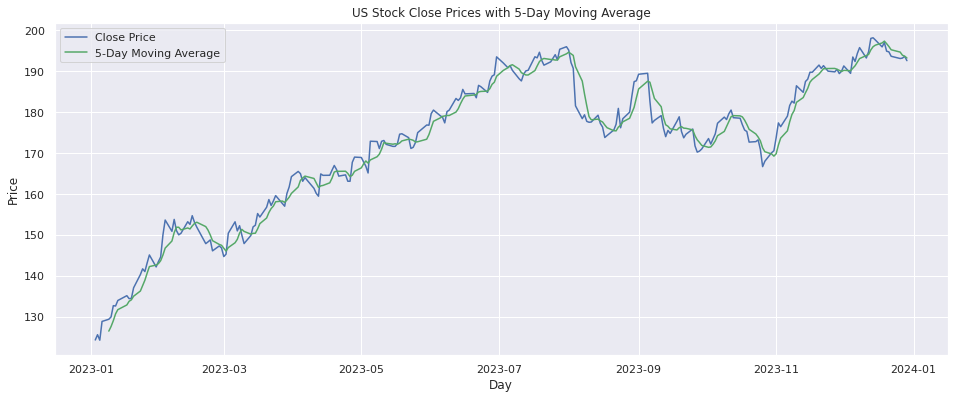

In [35]:
moving_average = []
for i in range(len(close_values)):                          #Finding 5-Days Moving Average(MA)
  if i < 4:
    moving_average.append(None)
  else:
    window = close_values['Close'][i-4:i+1]
    average = sum(window) / len(window)
    moving_average.append(average)

plt.plot(close_values['Date'],close_values['Close'], label='Close Price')
plt.plot(close_values['Date'][4:],moving_average[4:], label='5-Day Moving Average')


plt.xlabel('Day')
plt.ylabel('Price')
plt.title('US Stock Close Prices with 5-Day Moving Average')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

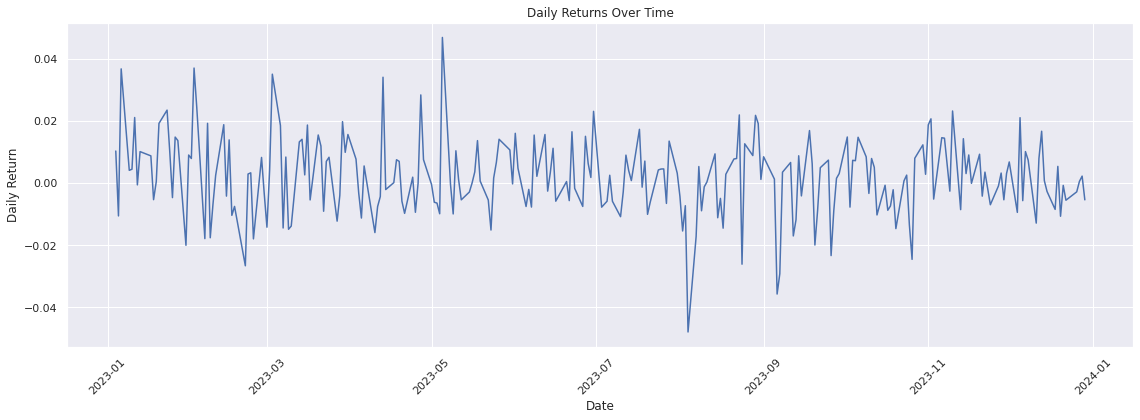

In [36]:
plt.plot(close_values['Date'],close_values['Return'])
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Daily Returns Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

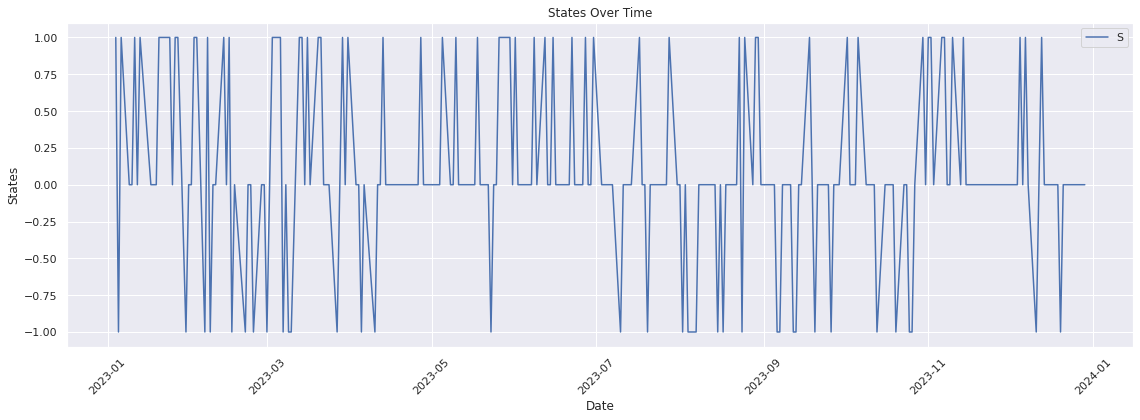

In [37]:

plt.plot(close_values['Date'],close_values['State'])
plt.legend('States')
plt.xlabel('Date')
plt.ylabel('States')
plt.title('States Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
def calculate_transition_distribution(data):     #finding the transition probabilities
 
  transition_counts = {(0,1):0,(0,-1):0,(1,0):0,(-1,0):0,(1,-1):0,(-1,0):0,(0,0):0}
  previous_state = None  

  for index, row in data.iterrows():
    current_state = row['State']

    if pd.isna(current_state):    #skipping the first day
      continue

    if previous_state is not None:
      transition_counts[(previous_state, current_state)] = transition_counts.get((previous_state, current_state), 0) + 1

    previous_state = current_state 

 
  transition_probs = {}
  for (prev_state, curr_state), count in transition_counts.items():
    total_transitions_from_prev = sum(value for key,value in transition_counts.items() if key[0] == prev_state)
    transition_probs[(prev_state, curr_state)] = count / total_transitions_from_prev  #finding the probability

  return transition_probs

In [45]:
def make_buy_decision(current_state, prev_state):
  if ((current_state == 1 and prev_state == 0) or (current_state==-1 and prev_state==0)):
    return True

  return False



transition_probs = calculate_transition_distribution(close_values)

portfolio_value = 0
buy_decisions = []
buy_dates=[]

for index, row in close_values.iterrows():
  current_state = row['State']
  prev_state = close_values.loc[index - 1, 'State'] if index > 0 else None  #skipping first day
    
  if(make_buy_decision(current_state, prev_state)):           
      buy_decisions.append(index)
      buy_dates.append(close_values.loc[index, 'Date'])
      if current_state == 1:
          portfolio_value += 1                           #calculating the portfolio value
      elif current_state == -1:
          portfolio_value -= 1
  if(index%10==0):                                      #displaying the portfolio values with a 10 days interval 
      print(f"Day: {row['Date']}, State: {current_state}, Portfolio Value: {portfolio_value}")
print(f"Day: {row['Date']}, State: {current_state}, Portfolio Value: {portfolio_value}")

print("\nTransition Probabilities:")
print("       1    0     -1")
for i in [1,0,-1]:
    print(" "+str(i),end="    ")
    for j in [1,0,-1]:
        print(round(transition_probs[(i,j)],2), end="   ")
    print()


print("\nBuy Decisions:")
for buy_decision in buy_decisions:
  print(buy_decision,end=" , ")

Day: 2023-01-03 00:00:00, State: nan, Portfolio Value: 0
Day: 2023-01-18 00:00:00, State: 0.0, Portfolio Value: 2
Day: 2023-02-01 00:00:00, State: 0.0, Portfolio Value: 4
Day: 2023-02-15 00:00:00, State: 1.0, Portfolio Value: 7
Day: 2023-03-02 00:00:00, State: 0.0, Portfolio Value: 4
Day: 2023-03-16 00:00:00, State: 1.0, Portfolio Value: 5
Day: 2023-03-30 00:00:00, State: 0.0, Portfolio Value: 6
Day: 2023-04-14 00:00:00, State: 0.0, Portfolio Value: 6
Day: 2023-04-28 00:00:00, State: 0.0, Portfolio Value: 7
Day: 2023-05-12 00:00:00, State: 0.0, Portfolio Value: 9
Day: 2023-05-26 00:00:00, State: 1.0, Portfolio Value: 10
Day: 2023-06-12 00:00:00, State: 1.0, Portfolio Value: 13
Day: 2023-06-27 00:00:00, State: 1.0, Portfolio Value: 16
Day: 2023-07-12 00:00:00, State: 0.0, Portfolio Value: 16
Day: 2023-07-26 00:00:00, State: 0.0, Portfolio Value: 16
Day: 2023-08-09 00:00:00, State: 0.0, Portfolio Value: 15
Day: 2023-08-23 00:00:00, State: 1.0, Portfolio Value: 14
Day: 2023-09-07 00:00:00

In [40]:
len(buy_decisions)

63

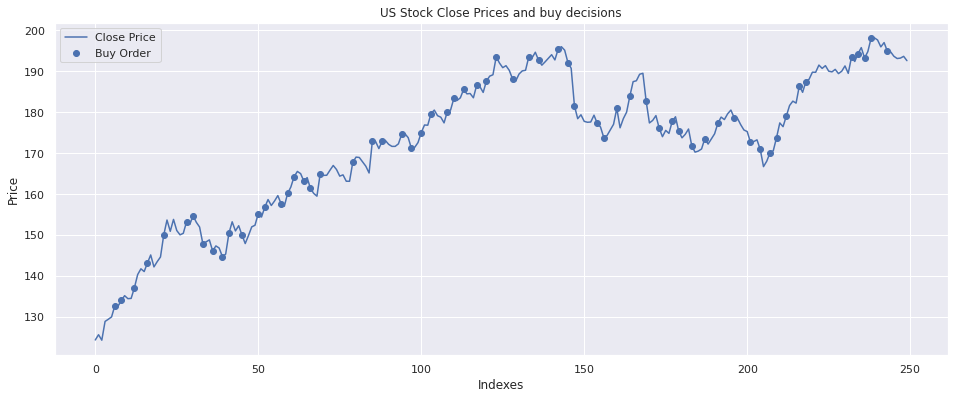

In [41]:
plt.plot(close_values['Close'], label='Close Price')
plt.scatter(buy_decisions,[close_values.loc[i, 'Close'] for i in buy_decisions],label='Buy Order')
plt.xlabel('Indexes')
plt.ylabel('Price')
plt.title('US Stock Close Prices and buy decisions')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [44]:
def is_valid_date(date_str):
  try:
    datetime.strptime(date_str, '%d-%m-%Y')
    return True
  except ValueError:
    return False

In [46]:
#finding the buy indexes for certain days in the year 2023
while True:
  try:
    start_date = input("Enter starting date (dd-mm-yyyy): ")
    if not is_valid_date(start_date):
      raise ValueError("Invalid start date format")
    end_date = input("Enter ending date (dd-mm-yyyy): ")
    if not is_valid_date(end_date):
      raise ValueError("Invalid end date format")
    break
  except ValueError as e:
    print(e)

Enter starting date (dd-mm-yyyy):  08-06-2023
Enter ending date (dd-mm-yyyy):  08-07-2023


In [50]:
for i in buy_dates:
    if ((i >= datetime.strptime(start_date, '%d-%m-%Y')) & (i <=datetime.strptime(end_date, '%d-%m-%Y'))):
        print(i)

2023-06-08 00:00:00
2023-06-12 00:00:00
2023-06-15 00:00:00
2023-06-22 00:00:00
2023-06-27 00:00:00
2023-06-30 00:00:00


In [48]:
type(i)

pandas._libs.tslibs.timestamps.Timestamp